## TASK 2: CNN: CelebA Dataset

In [1]:
!pip install torch torchvision torchaudio

In [2]:
# Import necessary libraries

import numpy as np
import matplotlib.pyplot as plt

### 1. Load CelebA Dataset

In [3]:
import torchvision 

image_path = './'
celeba_train_dataset = torchvision.datasets.CelebA(image_path, split='train', target_type='attr', download=True)
celeba_valid_dataset = torchvision.datasets.CelebA(image_path, split='valid', target_type='attr', download=True)
celeba_test_dataset = torchvision.datasets.CelebA(image_path, split='test', target_type='attr', download=True)

print('Train set:', len(celeba_train_dataset))
print('Validation set:', len(celeba_valid_dataset))
print('Test set:', len(celeba_test_dataset))

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Train set: 162770
Validation set: 19867
Test set: 19962


### 2. Display Sample Images from the Dataset

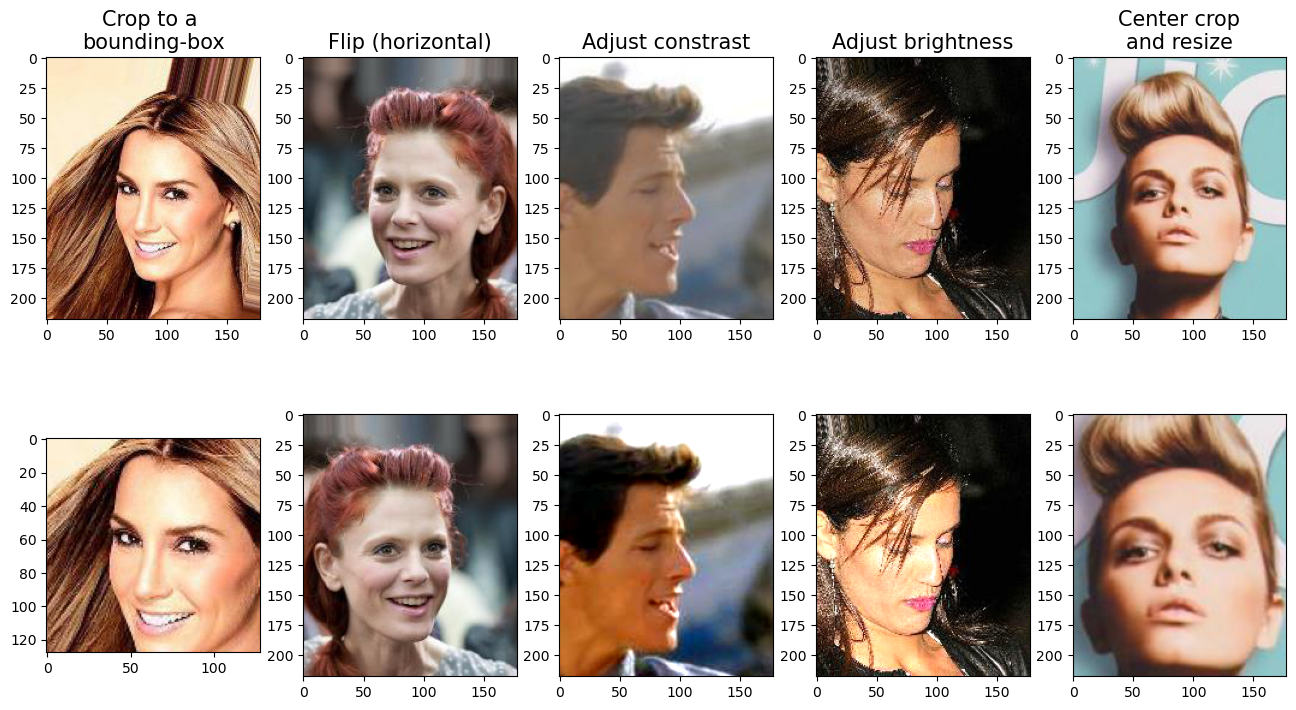

In [4]:
from torchvision import transforms 

## Take 5 sample images

fig = plt.figure(figsize=(16, 8.5))

## Column 1: cropping to a bounding-box
ax = fig.add_subplot(2, 5, 1)
img, attr = celeba_train_dataset[0]
ax.set_title('Crop to a \nbounding-box', size=15)
ax.imshow(img)
ax = fig.add_subplot(2, 5, 6)
img_cropped = transforms.functional.crop(img, 50, 20, 128, 128)
ax.imshow(img_cropped)

## Column 2: flipping (horizontally)
ax = fig.add_subplot(2, 5, 2)
img, attr = celeba_train_dataset[1]
ax.set_title('Flip (horizontal)', size=15)
ax.imshow(img)
ax = fig.add_subplot(2, 5, 7)
img_flipped = transforms.functional.hflip(img)
ax.imshow(img_flipped)

## Column 3: adjust contrast
ax = fig.add_subplot(2, 5, 3)
img, attr = celeba_train_dataset[2]
ax.set_title('Adjust constrast', size=15)
ax.imshow(img)
ax = fig.add_subplot(2, 5, 8)
img_adj_contrast = transforms.functional.adjust_contrast(img, contrast_factor=2)
ax.imshow(img_adj_contrast)

## Column 4: adjust brightness
ax = fig.add_subplot(2, 5, 4)
img, attr = celeba_train_dataset[3]
ax.set_title('Adjust brightness', size=15)
ax.imshow(img)
ax = fig.add_subplot(2, 5, 9)
img_adj_brightness = transforms.functional.adjust_brightness(img, brightness_factor=1.3)
ax.imshow(img_adj_brightness)

## Column 5: cropping from image center 
ax = fig.add_subplot(2, 5, 5)
img, attr = celeba_train_dataset[4]
ax.set_title('Center crop\nand resize', size=15)
ax.imshow(img)
ax = fig.add_subplot(2, 5, 10)
img_center_crop = transforms.functional.center_crop(img, [0.7*218, 0.7*178])
img_resized = transforms.functional.resize(img_center_crop, size=(218, 178))
ax.imshow(img_resized)
 
plt.show()

We have taken 5 sample images from the dataset. Then we made some necessary transformations of images like- cropping, resizing, adjusting brightness, adjusting contrast, flipping, etc. 

### 3. Dataset Preprocessing

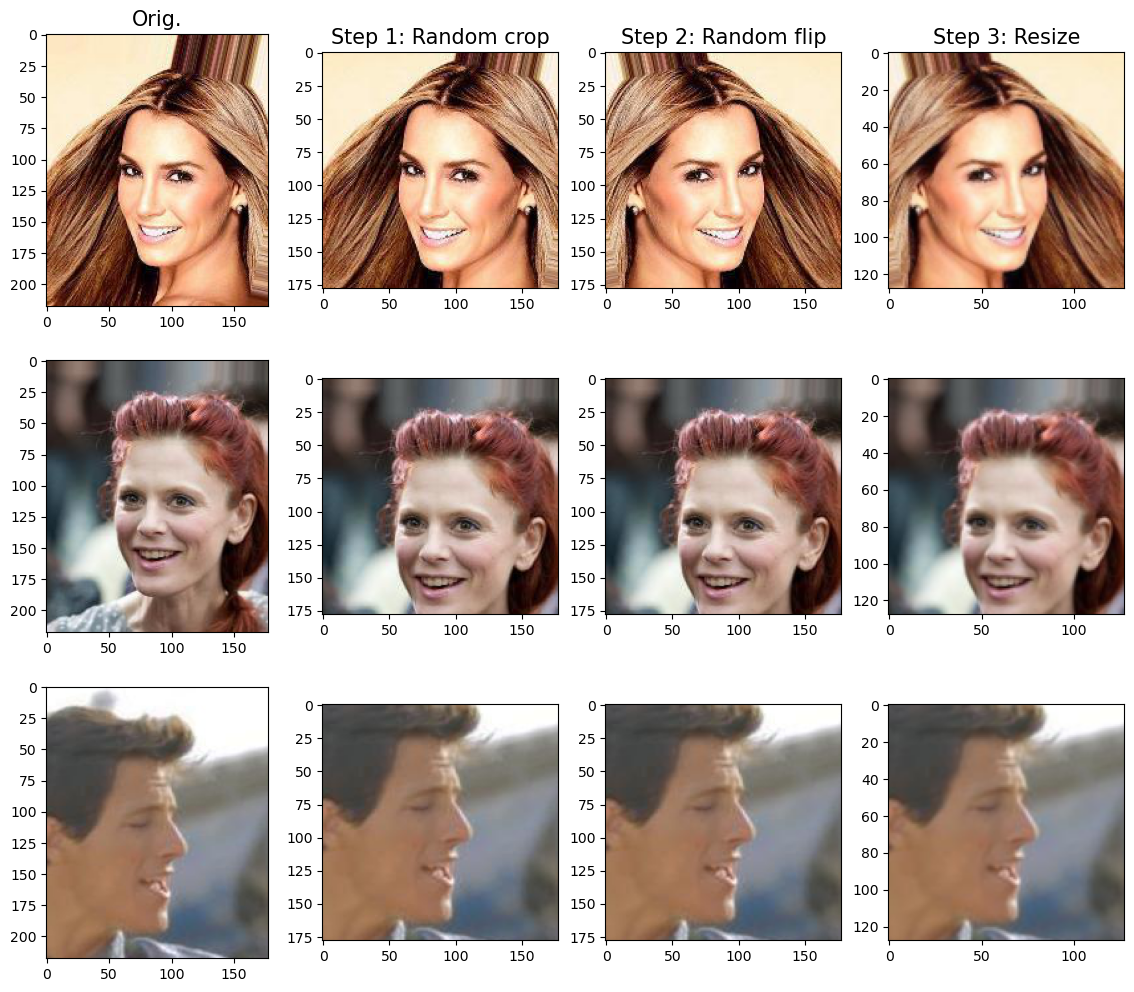

In [5]:
# Apply some transformations to the sample images

import torch
import torchvision

torch.manual_seed(1)

fig = plt.figure(figsize=(14, 12))

for i, (img, attr) in enumerate(celeba_train_dataset):
    ax = fig.add_subplot(3, 4, i*4+1)
    ax.imshow(img)
    if i == 0:
        ax.set_title('Orig.', size=15)
        
    ax = fig.add_subplot(3, 4, i*4+2)
    img_transform = transforms.Compose([transforms.RandomCrop([178, 178])])
    img_cropped = img_transform(img)
    ax.imshow(img_cropped)
    if i == 0:
        ax.set_title('Step 1: Random crop', size=15)

    ax = fig.add_subplot(3, 4, i*4+3)
    img_transform = transforms.Compose([transforms.RandomHorizontalFlip()])
    img_flip = img_transform(img_cropped)
    ax.imshow(img_flip)
    if i == 0:
        ax.set_title('Step 2: Random flip', size=15)

    ax = fig.add_subplot(3, 4, i*4+4)
    img_resized = transforms.functional.resize(img_flip, size=(128, 128))
    ax.imshow(img_resized)
    if i == 0:
        ax.set_title('Step 3: Resize', size=15)
    
    if i == 2:
        break
        
plt.show()

We again deep dived further to transform the original images with various image transformations by changing the size and flipping them randomly. This would help us achieve better results to check if the person is smiling or not.

In [6]:
# Perform image transformations for 'Smiling' attribute which is at column index=31

get_smile = lambda attr: attr[31]
 
transform_train = transforms.Compose([
    transforms.RandomCrop([178, 178]),
    transforms.RandomHorizontalFlip(),
    transforms.Resize([64, 64]),
    transforms.ToTensor(),
])

transform = transforms.Compose([
    transforms.CenterCrop([178, 178]),
    transforms.Resize([64, 64]),
    transforms.ToTensor(),
])

In [7]:
celeba_valid_dataset = torchvision.datasets.CelebA(image_path, 
                                                   split='valid', 
                                                   target_type='attr', 
                                                   download=False, 
                                                   transform=transform,
                                                   target_transform=get_smile)

celeba_test_dataset = torchvision.datasets.CelebA(image_path, 
                                                   split='test', 
                                                   target_type='attr', 
                                                   download=False, 
                                                   transform=transform,
                                                   target_transform=get_smile)

celeba_train_dataset = torchvision.datasets.CelebA(image_path, 
                                                   split='test', 
                                                   target_type='attr', 
                                                   download=False, 
                                                   transform=transform,
                                                   target_transform=get_smile)

from torch.utils.data import Subset
celeba_train_dataset = Subset(celeba_train_dataset, torch.arange(16000)) 
celeba_valid_dataset = Subset(celeba_valid_dataset, torch.arange(1000)) 
 
print('Train set:', len(celeba_train_dataset))
print('Validation set:', len(celeba_valid_dataset))

Train set: 16000
Validation set: 1000


In [8]:
from torch.utils.data import DataLoader

batch_size = 32

torch.manual_seed(1)
train_dl = DataLoader(celeba_train_dataset, batch_size, shuffle=True)
valid_dl = DataLoader(celeba_valid_dataset, batch_size, shuffle=False)
test_dl = DataLoader(celeba_test_dataset, batch_size, shuffle=False)

In [9]:
# convolutional neural network (CNN) architecture using PyTorch
## Conv2d layer applies a 2D convolution operation to the input data.
## ReLU() activation function introduces non-linearity into the network.
## MaxPool2d reduces the spatial dimensions by selecting the maximum value.
## Dropout is a technique to prevent overfitting.

import torch.nn as nn

model = nn.Sequential()

model.add_module('conv1', nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1))
model.add_module('relu1', nn.ReLU())        
model.add_module('pool1', nn.MaxPool2d(kernel_size=2))  
model.add_module('dropout1', nn.Dropout(p=0.5)) 

model.add_module('conv2', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1))
model.add_module('relu2', nn.ReLU())        
model.add_module('pool2', nn.MaxPool2d(kernel_size=2))   
model.add_module('dropout2', nn.Dropout(p=0.5)) 

model.add_module('conv3', nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1))
model.add_module('relu3', nn.ReLU())        
model.add_module('pool3', nn.MaxPool2d(kernel_size=2))   

model.add_module('conv4', nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1))
model.add_module('relu4', nn.ReLU())  

1. Conv2D (Convolutional Layer):
An essential component of CNNs is the Convolutional Layer, also known as Conv2D.
It employs a collection of learnable filters, commonly referred to as kernels, to conduct convolution on input data, which is typically pictures.
Every filter calculates a dot product with the local receptive field by swiping over the input image.
A collection of feature maps that extract various patterns and features from the input make up this layer's output.
Convolution is useful for identifying textures, edges, and other spatial patterns.

2. MaxPooling (Pooling Layer):
The feature maps' spatial dimensions are decreased by the MaxPooling Layer, also known as MaxPool.
In order to work, it chooses the maximum value inside a narrow window (often 2 by 2 or 3 by 3) and eliminates the other values.
By downsampling the feature maps, MaxPooling helps reduce computation and strengthen the network's resistance to translations.

3. ReLU (Rectified Linear Unit):
The Rectified Linear Unit (ReLU) is an activation function commonly used in CNNs.
It replaces negative values with zero and leaves positive values unchanged.
ReLU introduces non-linearity, allowing the network to learn complex representations.

4. Dropout:
A regularization method called dropout is employed to stop overfitting.
It randomly sets a portion of the input units (neurons) to zero during training.
This prevents the network from being dependent on any particular neurons, forcing it to acquire more robust properties.
Dropout lowers the chance of overfitting and enhances generalization.

Take a look at the structure of the model

In [10]:
x = torch.ones((4, 3, 64, 64))
model(x).shape

torch.Size([4, 256, 8, 8])

In [11]:
model.add_module('pool4', nn.AvgPool2d(kernel_size=8)) 
model.add_module('flatten', nn.Flatten()) 

x = torch.ones((4, 3, 64, 64))
model(x).shape

torch.Size([4, 256])

In [12]:
# The sigmoid function serves as an activation function within neural networks. It learn complex relationships between inputs and outputs.

model.add_module('fc', nn.Linear(256, 1)) 
model.add_module('sigmoid', nn.Sigmoid()) 

In [13]:
x = torch.ones((4, 3, 64, 64))
model(x).shape

torch.Size([4, 1])

In [14]:
# Check model summary
model

Sequential(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.5, inplace=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu4): ReLU()
  (pool4): AvgPool2d(kernel_size=8, stride=8, padding=0)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

1. Convolutional Layer (Conv2D): This layer applies convolution to the input data.
2. Max Pooling Layer (MaxPooling2D): This reduces the spatial dimensions of the feature maps.
3. Dropout Layer: 50% of the neurons are randomly dropped during training to help prevent overfitting.
4. Flatten Layer: Converts the 2D feature maps into a 1D vector for fully connected layers.
5. Fully Connected Layer (Dense): The first dense layer has 128 units with ReLU activation.
6. Model Compilation: The model is compiled with the Adam optimizer and binary cross-entropy loss.

In [15]:
# device = torch.device('cuda:0')
# Mac doesn't support cuda
device = torch.device("cpu")
model = model.to(device) 

### 4. Train & Evaluate the Model

In [16]:
# Loss Function and Optimizer
## Using binary cross-entropy loss function, commonly used for binary classification tasks.
## Adam optimizer with a learning rate of 0.001, updates the model’s parameters during training.

loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def train(model, num_epochs, train_dl, valid_dl):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        model.train()
        for x_batch, y_batch in train_dl:
            x_batch = x_batch.to(device) 
            y_batch = y_batch.to(device) 
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch.float())
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()*y_batch.size(0)
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum().cpu()

        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)
        
        model.eval()
        with torch.no_grad():
            for x_batch, y_batch in valid_dl:
                x_batch = x_batch.to(device) 
                y_batch = y_batch.to(device) 
                pred = model(x_batch)[:, 0]
                loss = loss_fn(pred, y_batch.float())
                loss_hist_valid[epoch] += loss.item()*y_batch.size(0) 
                is_correct = ((pred>=0.5).float() == y_batch).float()
                accuracy_hist_valid[epoch] += is_correct.sum().cpu()

        loss_hist_valid[epoch] /= len(valid_dl.dataset)
        accuracy_hist_valid[epoch] /= len(valid_dl.dataset)
        
        print(f'Epoch {epoch+1} accuracy: {accuracy_hist_train[epoch]:.4f} val_accuracy: {accuracy_hist_valid[epoch]:.4f}')
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

# The training loop iterates over the specified number of epochs.
torch.manual_seed(1)
num_epochs = 30
hist = train(model, num_epochs, train_dl, valid_dl)

Epoch 1 accuracy: 0.5120 val_accuracy: 0.4990
Epoch 2 accuracy: 0.5270 val_accuracy: 0.5520
Epoch 3 accuracy: 0.5767 val_accuracy: 0.5810
Epoch 4 accuracy: 0.6945 val_accuracy: 0.7410
Epoch 5 accuracy: 0.7533 val_accuracy: 0.7610
Epoch 6 accuracy: 0.7716 val_accuracy: 0.8140
Epoch 7 accuracy: 0.7960 val_accuracy: 0.8220
Epoch 8 accuracy: 0.8242 val_accuracy: 0.8130
Epoch 9 accuracy: 0.8435 val_accuracy: 0.8760
Epoch 10 accuracy: 0.8543 val_accuracy: 0.8800
Epoch 11 accuracy: 0.8636 val_accuracy: 0.9040
Epoch 12 accuracy: 0.8679 val_accuracy: 0.9030
Epoch 13 accuracy: 0.8747 val_accuracy: 0.8940
Epoch 14 accuracy: 0.8786 val_accuracy: 0.9090
Epoch 15 accuracy: 0.8833 val_accuracy: 0.9160
Epoch 16 accuracy: 0.8834 val_accuracy: 0.9080
Epoch 17 accuracy: 0.8850 val_accuracy: 0.9040
Epoch 18 accuracy: 0.8909 val_accuracy: 0.9030
Epoch 19 accuracy: 0.8886 val_accuracy: 0.9190
Epoch 20 accuracy: 0.8911 val_accuracy: 0.9140
Epoch 21 accuracy: 0.8930 val_accuracy: 0.8970
Epoch 22 accuracy: 0.8

1. Accuracy Trend: Over the course of the 30 epochs (training iterations), the model's accuracy steadily rises. This is encouraging since it shows that the model is picking up new skills and refining its predictions based on the training set. But it's critical to assess the model's generalization performance to new data (validation set).

2. Validation Accuracy Trend: The validation accuracy exhibits a consistent upward trend. How well the model functions on data that it hasn't encountered during training is determined by its validation accuracy. Good generalization is shown by training and validation accuracy closely aligning.

3. Overfitting Check: Comparing the training and validation accuracy to determine whether overfitting has occurred. Overfitting may be indicated if the training accuracy is noticeably higher than the validation accuracy.

### 5. Plot the Training Results

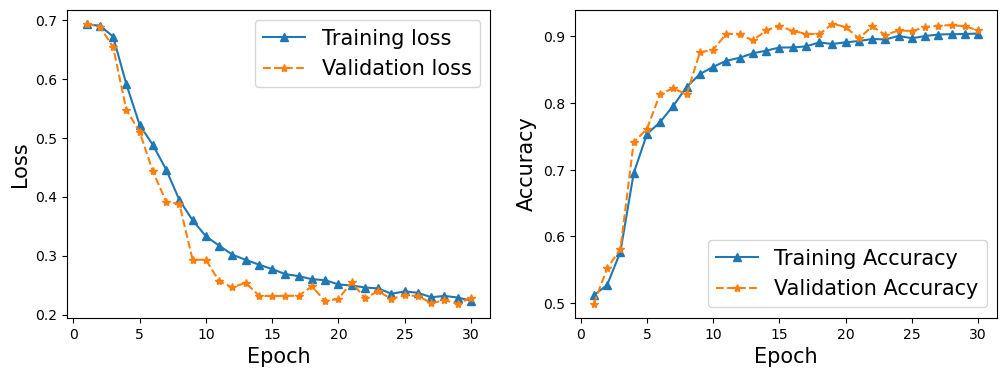

In [17]:
x_arr = np.arange(len(hist[0])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist[0], '-^', label='Training loss')
ax.plot(x_arr, hist[1], '--*', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist[2], '-^', label='Training Accuracy')
ax.plot(x_arr, hist[3], '--*', label='Validation Accuracy')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)


plt.show()

1. Training Loss vs Validation Loss-->
* As the number of epochs (training iterations) rises, the training loss (shown in blue) gradually drops. As the model learns from the training set and modifies its parameters to minimize the loss function, this behavior is expected.
* The orange-colored validation loss likewise starts off decreasing but reaches a level after about 15 epochs. This plateau suggests that training the model further may not greatly enhance its performance on untested data beyond this point.
* The lack of a significant difference between the loss during training and validation implies that overfitting—the situation in which the model performs well during training but badly during validation—is not a significant worry.

2. Training Accuracy vs Validation Accuracy-->
* With more epochs, both training accuracy (blue curve) and validation accuracy (orange curve) rise. This pattern suggests that the model is getting better at making predictions.
* But after around 20 epochs, the validation accuracy reaches a plateau and the training accuracy just slightly increases. This divergence may indicate overfitting before its time.
* The model appears to be generalizing effectively to new data, based on the near alignment of both curves.

In conclusion, the model shows encouraging behavior, but in order to avoid overfitting, careful observation of the validation measures is essential. When training and validation measures advance together and produce a well-balanced model, that is the optimum situation.

### 6. Evaluate the Model on the Test Dataset

In [18]:
# Check the test data accuracy

test_acc = 0

model.eval()
with torch.no_grad():
    for x_batch, y_batch in test_dl:
        x_batch = x_batch.to(device) 
        y_batch = y_batch.to(device) 
        pred = model(x_batch)[:, 0]
        is_correct = ((pred>=0.5).float() == y_batch).float()
        test_acc += is_correct.sum().cpu()
 
test_acc /= len(test_dl.dataset)
        
print(f'Test accuracy: {test_acc*100:.2f}%') 

Test accuracy: 92.34%


A Convolutional Neural Network (CNN) model that achieves a test accuracy of 92% means that 92% of the test data samples have the class labels accurately predicted by the model. Put otherwise, 92 out of 100 test samples are correctly classified by the model.
And remaining 8% of the test samples are incorrectly categorized.

### 7. Make Predictions on Sample Test Images

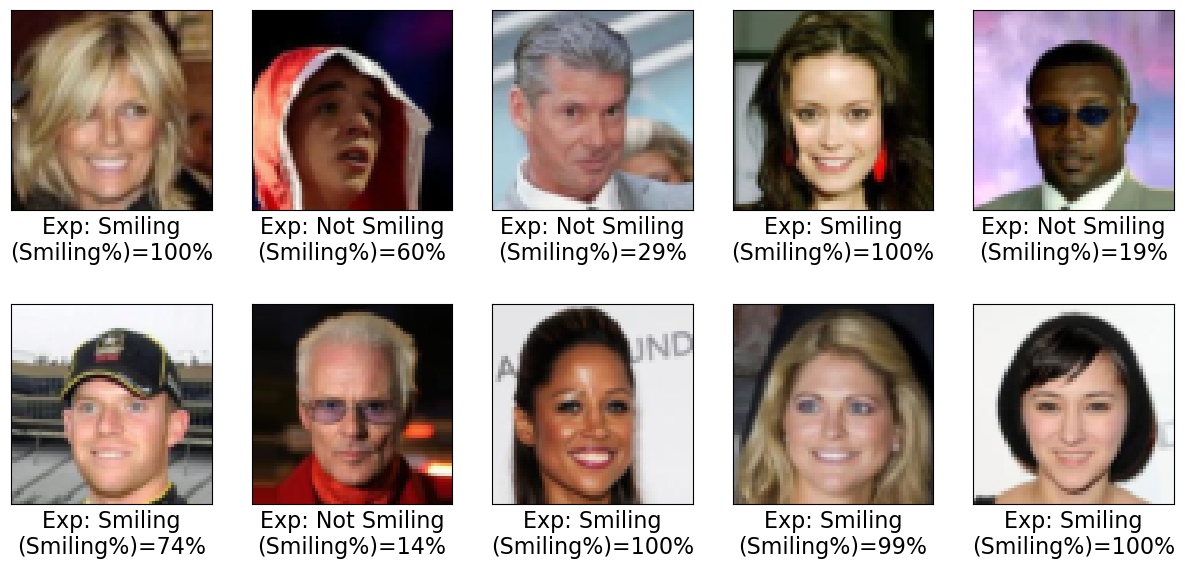

In [19]:
pred = model(x_batch)[:, 0] * 100

fig = plt.figure(figsize=(15, 7))
for j in range(10, 20):
    ax = fig.add_subplot(2, 5, j-10+1)
    ax.set_xticks([]); ax.set_yticks([]
    ax.imshow(x_batch[j].cpu().permute(1, 2, 0))
    if y_batch[j] == 1:
        label = 'Smiling'
    else:
        label = 'Not Smiling'
    ax.text(
        0.5, -0.15, 
        f'Exp: {label:s}\n(Smiling%)={pred[j]:.0f}%', 
        size=16, 
        horizontalalignment='center',
        verticalalignment='center', 
        transform=ax.transAxes)
    

plt.show()

Finally, we have estimated how well a model can detect if a person is smiling or not using sample images. The model also depicts the percentage of Smiling for each image. A confidence percentage for each forecast is shown next to it.
The model's level of confidence in its forecast is indicated by this percentage.
Stronger certainty in the prediction is indicated by higher confidence percentages.